In [20]:
import gzip, json, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    #"font.serif": ["Palatino"],
    
    "legend.frameon": False,
    "legend.fancybox": False,
    
    'font.size': 8,
    'axes.linewidth': 0.6,

    'xtick.major.width': 0.6,
    'ytick.major.width': 0.6,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    
    "lines.linewidth": 0.9,
    
    "axes.grid": True,
    "grid.color": "#EEE"
    })

plt.rc("text.latex", preamble=r"\usepackage{amsmath}")

In [2]:
def load_files(pattern): # data map (example_i[, target_label]) => data
    data = {}
    max_memory = 0.0
    for filename in glob.glob(pattern):
        print("Reading file:", filename)
        with gzip.open(filename, "r") as f:
            lines = f.readlines()
            for line in lines:
                j = json.loads(line)
                #print(filename, j.keys())
                example_i = j["example_i"]
                if "target_label" in j:
                    key = (example_i, j["target_label"])
                else:
                    key = example_i

                d = data.get(key, {})
                data[key] = d
                
                if "veritas_deltas" in j:
                    max_memory = max(max_memory, max(x["memory"][-1] for x in j["veritas_log"]))
                    try: column_prefix = f"veritas{j['max_time']:02d}"
                    except:
                        s0 = filename.find("time")+4
                        s1 = filename.find("-", s0)
                        max_time = int(filename[s0:s1])
                        #print("no max time in", filename, f"extracted '{max_time}' from filename")
                        column_prefix = f"veritas{max_time:02d}"
                    d[f"{column_prefix}_time"] = j["veritas_time"]
                    d[f"{column_prefix}_delta"] = j["veritas_deltas"][-1][0]
                
                if "merge_ext" in j and "max_clique" in j["merge_ext"]:
                    column_prefix = f"mext_T{j['merge_ext']['max_clique']}_L{j['merge_ext']['max_level']}"
                    d[f"{column_prefix}_time"] = j["merge_ext"]["times"][-1]
                    d[f"{column_prefix}_delta"] = j["merge_ext"]["deltas"][-1]
                    
                if "kantchelian" in j:
                    column_prefix = "kan"
                    d[f"{column_prefix}_time"] = j["kantchelian"]["time_p"]
                    d[f"{column_prefix}_delta"] = j["kantchelian_delta"]
    print(f"max_memory for {pattern} is: {max_memory/(1024*1024)}")
    return data

def get_column_names(data):
    columns = set()
    for value in data.values():
        columns |= value.keys()
    return sorted(columns)
        

def to_df(data):
    colnames = get_column_names(data)
    columns = {}
    index = pd.Series(list(data.keys()))
    for c in colnames:
        values = {}
        for key, value in data.items():
            if c in value:
                values[key] = value[c]
        columns[c] = values
    df = pd.DataFrame(columns)
    df.set_index(index)
    return df

def load_to_df(pattern, dropna=True):
    data = load_files(pattern)
    df = to_df(data)
    df.sort_index(inplace=True, axis=0)
    if dropna: df = df.dropna()
    return df

In [3]:
dfs={}

In [4]:
dfs["covtype"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-covtype-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time4-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time6-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time10-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time2-100:500-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time10-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time2-0:100-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time8-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time6-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-covtype-time4-0:100-1000.g

In [5]:
dfs["f-mnist"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time10-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time2-0:50-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time6-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time8-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time2-100:101-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time2-50:100-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-time4-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-0:500-0e00.gz
max_memory for /home/laurens/repos/veritas/tests/experiments/results/r1-f-mnist-* is: 34.70877456665039


In [6]:
dfs["higgs"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-higgs-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-0:100-0e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-0:10-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time10-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-20:30-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time6-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-10:20-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time4-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-higgs-time2-60:80-0001.gz
Reading file: /home/laurens/repos/ve

In [7]:
dfs["ijcnn1"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time6-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time8-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time4-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time6-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time10-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time2-100:500-0001.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time8-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time10-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-ijcnn1-time4-0:100-1e00.gz
Reading 

In [8]:
dfs["mnist"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-mnist-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-time6-100:200-1100.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-time8-100:200-1100.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-time2-100:200-1101.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-100:200-0e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-time4-100:200-1100.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-time10-100:200-1100.gz
max_memory for /home/laurens/repos/veritas/tests/experiments/results/r1-mnist-* is: 70.97529602050781


In [9]:
dfs["webspam"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-webspam-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time10-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time4-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-0:500-0e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time8-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time8-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time6-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time4-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time10-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-webspam-time2-50:100-0001.gz
Readi

In [10]:
dfs["mnist2v6"] = load_to_df("/home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-*")

Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time8-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time4-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time4-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time10-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time10-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time2-100:500-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-100:500-0e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time6-0:100-1000.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time2-0:100-1e00.gz
Reading file: /home/laurens/repos/veritas/tests/experiments/results/r1-mnist2v6-time6-100:500-10

In [11]:
gridcolor="#EEEEEE"

# Bound difference

scale higgs 10000.0


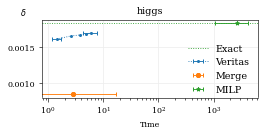

In [156]:
#datasets = ["covtype", "f-mnist", "higgs"]
#datasets = ["ijcnn1", "mnist", "webspam", "mnist2v6"]
datasets = ["covtype", "f-mnist", "higgs", "ijcnn1", "mnist", "webspam"]
datasets = ["higgs"]

fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*4.0, 1.8))
fig.subplots_adjust(left=0.15, right=0.9, top=0.85, bottom=0.25)

axs=[axs]

for d, ax in zip(datasets, axs):
    df = dfs[d]
    #display(d, df)
    time_columns = [c for c in df.columns if c.endswith("time")]
    delta_columns = [c for c in df.columns if c.endswith("delta")]
    time_mean = df[time_columns].mean()
    time_std = df[time_columns].std()
    #div_from_opt = df[delta_columns].subtract(df["kan_delta"], axis=0).abs().mean()
    div_from_opt = df[delta_columns].mean()
    speedup = (1.0/df[time_columns].divide(df["kan_time"], axis=0)).mean()
    
    scale_ = np.log10(div_from_opt.max().max()).round()
    scale = 10**-scale_ * 10
    
    print("scale", d, scale)
    #div_from_opt *= scale
    
    veritas_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("veritas")]
    veritas_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("veritas")]
    mer_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("mext")]
    mer_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("mext")]
    
    #ax.set_title(f"{d} (n={len(df)})")
    ax.set_title(f"{d}")
    ax.set_xlabel("Time")
    #ax.set_ylabel("Robustness delta value")
    #if scale != 1.0:
    #    ax.text(-0.2, 1.1, f'$\\delta \\times 10^{{{scale_:.0f}}}$', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    #else:
    ax.text(-0.1, 1.1, f'$\\delta$', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    
    #ax.plot(time_mean[veritas_time_columns], div_from_opt[veritas_delta_columns], marker=".", linestyle="-", markersize=4, label="Veritas")
    ax.errorbar(time_mean[veritas_time_columns], div_from_opt[veritas_delta_columns], xerr=time_std[veritas_time_columns],
               capthick=1.0, elinewidth=None, capsize=2.0, marker=".", linestyle=":", markersize=4, errorevery=4, label="Veritas")
    #for i, (x, y, m) in enumerate(zip(time_mean[veritas_time_columns], div_from_opt[veritas_delta_columns], speedup[veritas_time_columns])):
    #    ax.text(x, y-0.1, f"{m:.0f}×", horizontalalignment='right', verticalalignment='top', c="gray")
    #l, = ax.plot(time_mean[mer_time_columns], div_from_opt[mer_delta_columns], marker="8", markersize=5, linestyle=":", label="Merge")
    #for i, (x, y, m) in enumerate(zip(time_mean[mer_time_columns], div_from_opt[mer_delta_columns], speedup[mer_time_columns])):
    #    ax.text(x, y-0.1, f"{m:.0f}×", horizontalalignment='right', verticalalignment='top', c="gray")
    #ax.axhline(y=div_from_opt[mer_delta_columns][0], c=l.get_color(), ls=l.get_linestyle())
    ax.errorbar(time_mean[mer_time_columns], div_from_opt[mer_delta_columns], xerr=time_std[mer_time_columns],
               capthick=1.0, elinewidth=None, capsize=2.0, marker="8", markersize=5, linestyle="", label="Merge")
    #l, = ax.plot(time_mean[["kan_time"]], div_from_opt[["kan_delta"]], marker="*", linestyle=":", markersize=4, label="MILP")
    ax.errorbar(time_mean[["kan_time"]], div_from_opt[["kan_delta"]], marker="*", linestyle="", markersize=4,
                xerr=time_std[["kan_time"]],
               capthick=1.0, elinewidth=0.0, capsize=2.0, ecolor=l.get_color(), barsabove=True, label="MILP")
    ax.axhline(y=div_from_opt["kan_delta"], c=l.get_color(), ls=l.get_linestyle(), label="Exact")

    ax.set_xscale("log")
    
    #xlim = (0.0, 1.1*time_mean["kan_time"])
    #ax.set_xlim(xlim)
    #ax.set_xticks(list(np.arange(0.0,xlim[1], 10.0)))
    ax.legend(fontsize="large", bbox_to_anchor=(1.0, 0.8))

plt.savefig("/tmp/bound_err.pdf")
plt.show()

# Counting stats

same threshold covtype: 0.000140217900073348
same threshold f-mnist: 0.070001
same threshold higgs: 2.838408038435969e-05
same threshold ijcnn1: 0.00012703378692179704
same threshold mnist: 0.14200080000400025
same threshold webspam: 1.026224750620025e-05
same threshold mnist2v6: 0.06


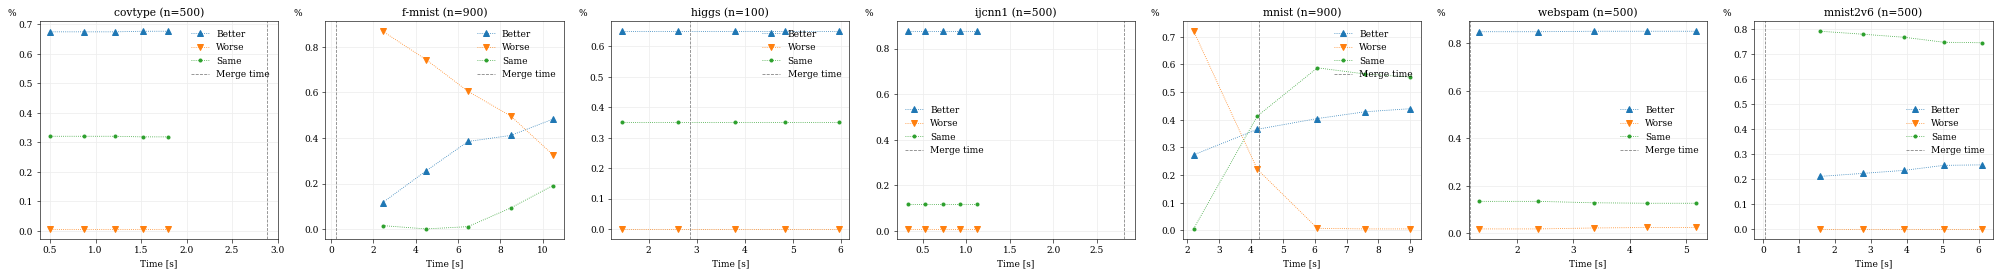

In [12]:

fig, axs = plt.subplots(1, len(dfs), figsize=(len(dfs)*5, 4))

better_stats = {}
worse_stats = {}
same_stats = {}

for (d, df), ax in zip(dfs.items(), axs):
    time_columns = [c for c in df.columns if c.endswith("time")]
    delta_columns = [c for c in df.columns if c.endswith("delta")]
    time_mean = df[time_columns].mean()
    veritas_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("veritas")]
    veritas_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("veritas")]
    mer_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("mext")]
    mer_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("mext")]
    
    div_from_opt = df[delta_columns].subtract(df["kan_delta"], axis=0).abs()
    
    same_threshold = (df["kan_delta"].quantile(0.8) - df["kan_delta"].quantile(0.2)) / 100
    
    print(f"same threshold {d}: {same_threshold}")
    
    ver_better = div_from_opt[delta_columns].subtract(div_from_opt[mer_delta_columns[0]], axis=0) < -same_threshold
    ver_worse = div_from_opt[delta_columns].subtract(div_from_opt[mer_delta_columns[0]], axis=0) > same_threshold
    ver_same = ~ver_better & ~ver_worse
    #display(ver_better.sum(), ver_worse.sum(), ver_same.sum())
    
    n = len(df)
    ax.set_title(f"{d} (n={n})")
    ax.set_xlabel("Time [s]")
    #ax.set_ylabel("Robustness delta value")
    ax.text(-0.1, 1.04, '%', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    
    ax.plot(time_mean[veritas_time_columns], ver_better.sum()[veritas_delta_columns]/n, marker="^", linestyle=":", label="Better")
    ax.plot(time_mean[veritas_time_columns], ver_worse.sum()[veritas_delta_columns]/n, marker="v", linestyle=":", label="Worse")
    ax.plot(time_mean[veritas_time_columns], ver_same.sum()[veritas_delta_columns]/n, marker=".", linestyle=":", label="Same")
    ax.axvline(x=time_mean[mer_time_columns[0]], ls="--", color="gray", label="Merge time")
    #ax.set_xscale("log")
    ax.legend()
    
    better_stats[d] = ver_better.sum()[veritas_delta_columns]/n
    worse_stats[d] = ver_worse.sum()[veritas_delta_columns]/n
    same_stats[d] = ver_same.sum()[veritas_delta_columns]/n

In [51]:
better_df = (pd.DataFrame(better_stats).transpose()*100).round(1)
worse_df = (pd.DataFrame(worse_stats).transpose()*100).round(1)
same_df = (pd.DataFrame(same_stats).transpose()*100).round(1)

In [52]:
display(better_df, worse_df, same_df)

,veritas02_delta,veritas04_delta,veritas06_delta,veritas08_delta,veritas10_delta
covtype,67.4,67.4,67.4,67.6,67.6
f-mnist,11.7,25.6,38.4,41.1,48.2
higgs,65.0,65.0,65.0,65.0,65.0
ijcnn1,87.6,87.6,87.6,87.6,87.6
mnist,27.3,36.6,40.4,42.9,44.0
webspam,84.8,84.8,85.0,85.0,85.0
mnist2v6,21.0,22.2,23.4,25.4,25.6


,veritas02_delta,veritas04_delta,veritas06_delta,veritas08_delta,veritas10_delta
covtype,0.6,0.6,0.6,0.6,0.6
f-mnist,86.8,74.3,60.4,49.6,32.7
higgs,0.0,0.0,0.0,0.0,0.0
ijcnn1,0.8,0.8,0.8,0.8,0.8
mnist,72.0,22.1,0.8,0.6,0.6
webspam,1.8,1.8,2.2,2.4,2.4
mnist2v6,0.0,0.0,0.0,0.0,0.0


,veritas02_delta,veritas04_delta,veritas06_delta,veritas08_delta,veritas10_delta
covtype,32.0,32.0,32.0,31.8,31.8
f-mnist,1.6,0.1,1.1,9.3,19.1
higgs,35.0,35.0,35.0,35.0,35.0
ijcnn1,11.6,11.6,11.6,11.6,11.6
mnist,0.7,41.3,58.8,56.6,55.4
webspam,13.4,13.4,12.8,12.6,12.6
mnist2v6,79.0,77.8,76.6,74.6,74.4


# How many problems are solved in 1s, 2s, ...

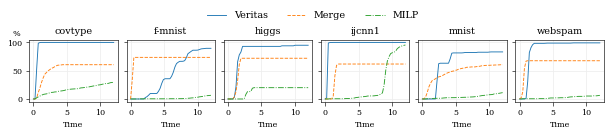

In [44]:
datasets = ["covtype", "f-mnist", "higgs", "ijcnn1", "mnist", "webspam"]
fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*1.4, 1.8), sharey=True, sharex=True)
fig.subplots_adjust(left=0.04, bottom=0.22, right=0.99
                    , top=0.7, wspace=0.1, hspace=0.4)
axs = axs.flatten()

better_stats = {}
worse_stats = {}
same_stats = {}

for (d, df), ax in zip(dfs.items(), axs):
    time_columns = [c for c in df.columns if c.endswith("time")]
    delta_columns = [c for c in df.columns if c.endswith("delta")]
    time_mean = df[time_columns].mean()
    veritas_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("veritas")]
    veritas_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("veritas")]
    mer_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("mext")]
    mer_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("mext")]
    
    times = np.linspace(0, 12, 50)
    div_from_opt = df[veritas_delta_columns+mer_delta_columns].subtract(df["kan_delta"], axis=0).abs()
    #q10, q50, q90 = pd.Series(div_from_opt.to_numpy().flatten()).quantile([0.25, 0.5, 1.0])
    #q50 = pd.Series(div_from_opt.to_numpy().flatten()).median()
    q50 = pd.Series(df[mer_delta_columns].subtract(df["kan_delta"], axis=0).abs().to_numpy().flatten()).mean()
    #print(d, "quantiles:", q10, q50, q90)
    #print("   how often do we see median?  ", (div_from_opt==q50).sum().sum()/len(df) * 100)
    #print("   how many unique error values?", len(pd.Series(div_from_opt.to_numpy().flatten()).unique()), np.prod(div_from_opt.shape))
    
    #in_time_ver = pd.concat([df[veritas_time_columns[0]]]*len(times), axis=1).le(times, axis=1)
    #in_time_ver.columns = [f"in_time{t:.2f}" for t in times]
    #in_time_mer = pd.concat([df[mer_time_columns[0]]]*len(times), axis=1).le(times, axis=1)
    #in_time_mer.columns = [f"in_time{t:.2f}" for t in times]
    in_time_kan = pd.concat([df["kan_time"]]*len(times), axis=1).le(times, axis=1)
    in_time_kan.columns = [f"in_time{t:.2f}" for t in times]
    
    in_time_ver10 = None
    in_time_ver50 = None
    in_time_ver90 = None
    for tcol, dcol in zip(veritas_time_columns, veritas_delta_columns):
        #x10 = pd.concat([(df[tcol]<=t) & ((df[dcol]-df["kan_delta"]).abs()<=q10) for t in times], axis=1)
        x50 = pd.concat([(df[tcol]<=t) & ((df[dcol]-df["kan_delta"]).abs()<=q50) for t in times], axis=1)
        #x90 = pd.concat([(df[tcol]<=t) & ((df[dcol]-df["kan_delta"]).abs()<=q90) for t in times], axis=1)
        #in_time_ver10 = (in_time_ver10 | x10) if in_time_ver10 is not None else x10
        in_time_ver50 = (in_time_ver50 | x50) if in_time_ver50 is not None else x50
        #in_time_ver90 = (in_time_ver90 | x90) if in_time_ver90 is not None else x90
    
    #in_time_mer10 = pd.concat([(df[mer_time_columns[0]]<=t) & ((df[mer_delta_columns[0]]-df["kan_delta"]).abs()<=q10) for t in times], axis=1)
    in_time_mer50 = pd.concat([(df[mer_time_columns[0]]<=t) & ((df[mer_delta_columns[0]]-df["kan_delta"]).abs()<=q50) for t in times], axis=1)
    #in_time_mer90 = pd.concat([(df[mer_time_columns[0]]<=t) & ((df[mer_delta_columns[0]]-df["kan_delta"]).abs()<=q90) for t in times], axis=1)
    
    n = len(df)
    #ax.set_title(f"{d} (n={n}, m={q50:.2g})")
    #ax.set_title(f"{d} (n={n})")
    ax.set_title(f"{d}")
    ax.set_xlabel("Time")
    #ax.set_ylabel("Robustness delta value")
    if d=="covtype":# or d=="ijcnn1":
        ax.text(-0.1, 1.09, '%', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)
    #lv, = ax.plot(times, in_time_ver.mean()*100, ls=(0, (2, 4)))
    #lm, = ax.plot(times, in_time_mer.mean()*100, ls=(0, (1, 4)))
    lv, = ax.plot(times, in_time_ver50.mean()*100, ls="-", label="Veritas")
    #ax.fill_between(times, in_time_ver10.mean()*100, in_time_ver90.mean()*100, alpha=0.1, color=lv.get_color())
    #ax.plot(times, in_time_ver10.mean()*100, ls=(0, (1, 4)), c=lv.get_color())
    #ax.plot(times, in_time_ver90.mean()*100, ls=(0, (1, 4)), c=lv.get_color())
    lm, = ax.plot(times, in_time_mer50.mean()*100, ls="--", label="Merge")
    #ax.fill_between(times, in_time_mer10.mean()*100, in_time_mer90.mean()*100, alpha=0.1, color=lm.get_color())
    #ax.plot(times, in_time_mer10.mean()*100, ls=(0, (1, 4)), c=lm.get_color())
    #ax.plot(times, in_time_mer90.mean()*100, ls=(0, (1, 4)), c=lm.get_color())
    ax.plot(times, in_time_kan.mean()*100, ls="-.", label="MILP")

axs[1].legend(ncol=3, bbox_to_anchor=(3.4, 1.6), fontsize="large")
#for ax in axs[3:]: ax.set_xlabel("Time")
plt.savefig("/tmp/solved_per_time.pdf")

# Tables

In [217]:
columns = ["MILP", "Veritas 4", "Veritas 6", "Veritas 8", "Veritas 10", "Merge", "MILP"]
rows = {}

def map_name(n):
    if "kan" in n:
        return "MIPS"
    if "veritas" in n:
        return f"$\\ouralg{{}}_{{{int(n[7:9])}}}$"
    if "mext" in n:
        return "\\merge{}"

for i, (d, df) in enumerate(dfs.items()):
    time_columns = [c for c in df.columns if c.endswith("time")]
    delta_columns = [c for c in df.columns if c.endswith("delta")]
    time_mean = df[time_columns].mean()
    veritas_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("veritas")]
    veritas_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("veritas")]
    mer_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("mext")]
    mer_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("mext")]
    
    r1 = df[delta_columns].mean()
    r1.index = [map_name(n) for n in r1.index]
    r2 = df[time_columns].mean()
    r2.index = [map_name(n) for n in r2.index]
    r3 = df[time_columns].std()
    r3.index = [map_name(n) for n in r3.index]
    
    rows[(d, "delta")] = r1
    rows[(d, "time")] = r2
    rows[(d, "std")] = r3

means_df = pd.DataFrame(rows)
means_df = means_df.transpose()

In [218]:
means_df

MIPS   \merge{}  $\ouralg{}_{2}$  $\ouralg{}_{4}$  \
covtype  delta     0.007955   0.004526         0.007895         0.007895   
         time     37.271346   2.883340         0.504584         0.878088   
         std      25.610134  32.209087         0.073717         0.119289   
f-mnist  delta     8.073358   7.009210        12.325041         8.178152   
         time     85.223998   0.252801         2.445797         4.492573   
         std      61.966192   0.087388         0.261290         0.272021   
higgs    delta     0.001829   0.000847         0.001610         0.001653   
         time   2644.863571   2.867370         1.446773         2.607556   
         std    1563.115263  14.341523         0.292342         0.630565   
ijcnn1   delta     0.021182   0.019074         0.021084         0.021084   
         time      9.311328   2.817678         0.329783         0.530190   
         std       1.955635  25.853099         0.067438         0.074384   
mnist    delta    10.358911   8.648654         8.853516         9.159044   
         time     30.191966   4.255967         2.211069         4.203706   
         std      17.497606   9.520250         0.121158         0.115625   
webspam  delta     0.001188   0.000813         0.001125         0.001131   
         time     36.182007   1.168128         1.339291         2.378902   
         std      13.286478  13.055535         0.225045         0.403970   
mnist2v6 delta     6.738021   6.179689         6.405254         6.426731   
         time      0.659939   0.070691         1.598397         2.794149   
         std       0.178184   0.654652         0.329323         0.837338   

                $\ouralg{}_{6}$  $\ouralg{}_{8}$  $\ouralg{}_{10}$  
covtype  delta         0.007895         0.007896          0.007896  
         time          1.214269         1.517084          1.796439  
         std           0.184485         0.257854          0.331883  
f-mnist  delta         7.334452         7.353917          7.449580  
         time          6.468991         8.493194         10.472264  
         std           0.307049         0.310812          0.346540  
higgs    delta         0.001666         0.001676          0.001694  
         time          3.803334         4.842005          5.955803  
         std           0.973622         1.313059          1.739081  
ijcnn1   delta         0.021084         0.021084          0.021084  
         time          0.730657         0.928204          1.125416  
         std           0.075945         0.075264          0.078495  
mnist    delta         9.306077         9.370268          9.406508  
         time          6.085704         7.579269          8.995128  
         std           0.329544         0.790505          1.350977  
webspam  delta         0.001133         0.001134          0.001135  
         time          3.371487         4.308298          5.169721  
         std           0.572657         0.727007          0.868893  
mnist2v6 delta         6.438987         6.454379          6.457929  
         time          3.930061         5.036968          6.091874  
         std           1.326064         1.837549          2.333940

In [223]:
print(means_df.to_latex(float_format="%.3g", escape=False))



\begin{tabular}{llrrrrrrr}
\toprule
         &     &     MIPS &  \merge{} &  $\ouralg{}_{2}$ &  $\ouralg{}_{4}$ &  $\ouralg{}_{6}$ &  $\ouralg{}_{8}$ &  $\ouralg{}_{10}$ \\
\midrule
covtype & delta &  0.00796 &   0.00453 &          0.00789 &           0.0079 &           0.0079 &           0.0079 &            0.0079 \\
         & time &     37.3 &      2.88 &            0.505 &            0.878 &             1.21 &             1.52 &               1.8 \\
         & std &     25.6 &      32.2 &           0.0737 &            0.119 &            0.184 &            0.258 &             0.332 \\
f-mnist & delta &     8.07 &      7.01 &             12.3 &             8.18 &             7.33 &             7.35 &              7.45 \\
         & time &     85.2 &     0.253 &             2.45 &             4.49 &             6.47 &             8.49 &              10.5 \\
         & std &       62 &    0.0874 &            0.261 &            0.272 &            0.307 &            0.311 &             0

In [98]:
time_columns = [c for c in df.columns if c.endswith("time")]
delta_columns = [c for c in df.columns if c.endswith("delta")]
veritas_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("veritas")]
veritas_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("veritas")]
mer_time_columns = [c for c in df.columns if c.endswith("time") and c.startswith("mext")]
mer_delta_columns = [c for c in df.columns if c.endswith("delta") and c.startswith("mext")]

In [5]:
delta_mean = df[delta_columns].mean()
time_mean = df[time_columns].mean()

In [6]:
df[delta_columns]

,kan_delta,mext_T4_L1_delta,veritas02_delta,veritas04_delta,veritas06_delta,veritas08_delta,veritas10_delta
0,10.0000,9.96094,9.960962,9.960962,9.960962,9.960962,9.960962
1,8.0001,8.00781,8.007833,8.007833,8.007833,8.007833,8.007833
2,7.0001,6.99219,6.992205,6.992205,6.992205,6.992205,6.992205
3,4.0000,4.02344,4.023448,3.984567,3.984567,3.984567,3.984567
4,21.0000,16.99220,18.085983,19.023485,19.023485,19.023485,19.023485
...,...,...,...,...,...,...,...
95,3.0000,3.00781,2.984472,2.984472,2.984472,2.984472,2.984472
96,4.0000,4.02344,3.984469,3.984469,3.984469,3.984469,3.984469
97,4.0000,4.02344,4.023448,4.023448,4.023448,4.023448,3.984469
98,12.0001,9.96094,11.992217,11.992217,11.992217,11.992217,11.992217


<ErrorbarContainer object of 3 artists>

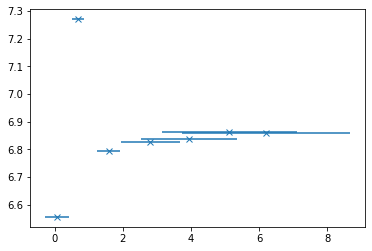

In [7]:
plt.errorbar(time_mean, delta_mean, marker="x", ls="", xerr=df[time_columns].std())#, yerr=df[delta_columns].std())

In [8]:
time_mean[veritas_time_columns]

veritas02_time    1.585113
veritas04_time    2.806644
veritas06_time    3.955637
veritas08_time    5.134696
veritas10_time    6.199970
dtype: float64

In [9]:
div_from_opt = df[delta_columns].subtract(df["kan_delta"], axis=0).abs().mean()

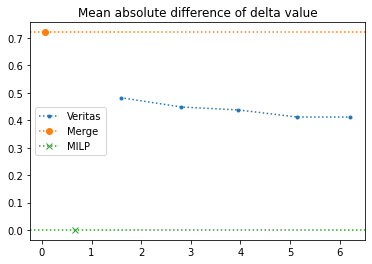

In [10]:
plt.title("Mean absolute difference of delta value")
plt.plot(time_mean[veritas_time_columns], div_from_opt[veritas_delta_columns], marker=".", linestyle=":", label="Veritas")
l, = plt.plot(time_mean[mer_time_columns], div_from_opt[mer_delta_columns], marker="o", linestyle=":", label="Merge")
plt.axhline(y=div_from_opt[mer_delta_columns][0], c=l.get_color(), ls=l.get_linestyle())
l, = plt.plot(time_mean[["kan_time"]], div_from_opt[["kan_delta"]], marker="x", linestyle=":", label="MILP")
plt.axhline(y=div_from_opt["kan_delta"], c=l.get_color(), ls=l.get_linestyle())
plt.legend()

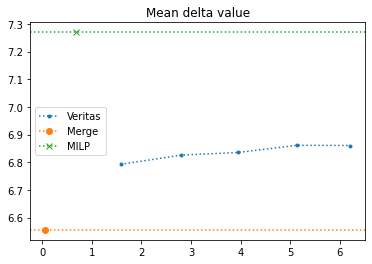

In [12]:
plt.title("Mean delta value")
plt.plot(time_mean[veritas_time_columns], delta_mean[veritas_delta_columns], marker=".", linestyle=":", label="Veritas")
l, = plt.plot(time_mean[mer_time_columns], delta_mean[mer_delta_columns], marker="o", linestyle=":", label="Merge")
plt.axhline(y=delta_mean[mer_delta_columns][0], c=l.get_color(), ls=l.get_linestyle())
l, = plt.plot(time_mean[["kan_time"]], delta_mean[["kan_delta"]], marker="x", linestyle=":", label="MILP")
plt.axhline(y=delta_mean["kan_delta"], c=l.get_color(), ls=l.get_linestyle())
plt.legend()

In [13]:
time_mean

kan_time           0.675315
mext_T4_L1_time    0.068644
veritas02_time     1.585113
veritas04_time     2.806644
veritas06_time     3.955637
veritas08_time     5.134696
veritas10_time     6.199970
dtype: float64

In [14]:
df[delta_columns].subtract(df["kan_delta"], axis=0).describe()

,kan_delta,mext_T4_L1_delta,veritas02_delta,veritas04_delta,veritas06_delta,veritas08_delta,veritas10_delta
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,-0.714555,-0.477401,-0.444191,-0.434500,-0.408718,-0.409417
std,0.0,1.116400,0.796676,0.741374,0.718356,0.689568,0.689143
min,0.0,-6.039060,-3.023410,-2.992155,-2.992155,-2.992155,-2.992155
25%,0.0,-1.027345,-1.007795,-0.996140,-0.992189,-0.976540,-0.976540
50%,0.0,-0.039060,-0.039038,-0.039038,-0.039038,-0.035138,-0.035138
75%,0.0,-0.007810,-0.015416,-0.015433,-0.015429,-0.015423,-0.015429
max,0.0,0.023440,0.023460,0.023460,0.023460,0.023460,0.023460


In [16]:
df[df["kan_delta"]>20]

,kan_delta,kan_time,mext_T4_L1_delta,mext_T4_L1_time,veritas02_delta,veritas02_time,veritas04_delta,veritas04_time,veritas06_delta,veritas06_time,veritas08_delta,veritas08_time,veritas10_delta,veritas10_time
4,21.0,1.370034,16.9922,0.026796,18.085983,1.756091,19.023485,3.555722,19.023485,4.752735,19.023485,5.965354,19.023485,7.165418
